In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
# df = pd.read_excel(url)
# print(df.head())

# # Rename columns for easier access
# df.columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
#               "CoarseAggregate", "FineAggregate", "Age", "Strength"]

# # Display first few rows
# print(df.head())

# # Check for missing values
# print(df.isnull().sum())

# # Summary statistics
# print(df.describe())


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sinamhd9/concrete-comprehensive-strength")

print("Path to dataset files:", path)

100%|██████████| 32.9k/32.9k [00:00<00:00, 13.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sinamhd9/concrete-comprehensive-strength/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path ="/root/.cache/kagglehub/datasets/sinamhd9/concrete-comprehensive-strength/versions/1/Concrete_Data.xls"
df = pd.read_excel(data_path)
print(df.head())

df.columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
              "CoarseAggregate", "FineAggregate", "Age", "Strength"]

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

X = df.drop(columns=['Strength'])
y = df['Strength']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1493.2539 - mae: 35.1632 - val_loss: 1214.4033 - val_mae: 31.2368
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1096.0653 - mae: 28.8965 - val_loss: 364.0104 - val_mae: 15.4974
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 311.3543 - mae: 13.8500 - val_loss: 206.2333 - val_mae: 11.6979
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 207.0250 - mae: 11.4990 - val_loss: 180.5863 - val_mae: 11.0119
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 198.8635 - mae: 11.4696 - val_loss: 167.3610 - val_mae: 10.6292
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 188.0433 - mae: 11.0883 - val_loss: 156.1110 - val_mae: 10.3450
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 171.5714 - mae: 10.6732 - val_loss: 149.6917 - val_mae: 10.1201
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 156.6266 - mae: 10.0532 - val_loss: 140.6251 - val_mae: 9.8562
Epoch 

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f" Mean Absolute Error (MAE): {test_mae:.2f}")


 Mean Absolute Error (MAE): 3.83


In [15]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred) *100
print(f" R-squared (R²): {r2:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 R-squared (R²): 87.83


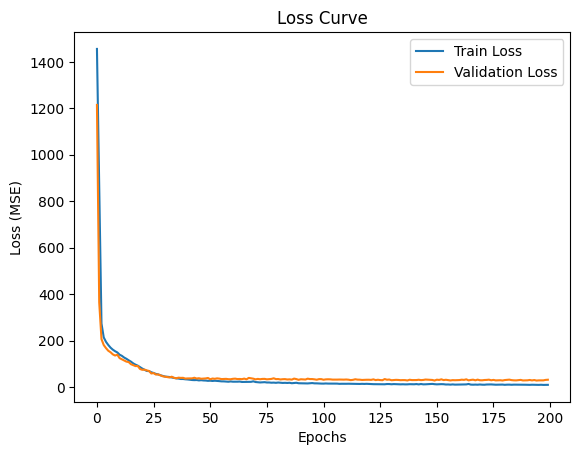

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Loss Curve')
plt.show()


In [10]:
model.save("concrete_strength.h5")

In [11]:
def predict_concrete_strength(model, scaler):
    print("\nEnter the concrete mix proportions:")
    cement = float(input("Cement (kg/m³): "))
    blast_furnace_slag = float(input("Blast Furnace Slag (kg/m³): "))
    fly_ash = float(input("Fly Ash (kg/m³): "))
    water = float(input("Water (kg/m³): "))
    superplasticizer = float(input("Superplasticizer (kg/m³): "))
    coarse_aggregate = float(input("Coarse Aggregate (kg/m³): "))
    fine_aggregate = float(input("Fine Aggregate (kg/m³): "))
    age = int(input("Age (days): "))


    user_data = np.array([[cement, blast_furnace_slag, fly_ash, water,
                           superplasticizer, coarse_aggregate, fine_aggregate, age]])

    user_data_df = pd.DataFrame(user_data, columns=["Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
                                                "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age"])
    user_data_scaled = scaler.transform(user_data_df)


    prediction = model.predict(user_data_scaled)

    print(f"\n🔹 Predicted Concrete Strength: {prediction[0][0]:.2f} MPa")


predict_concrete_strength(model, scaler)



Enter the concrete mix proportions:
Cement (kg/m³): 200
Blast Furnace Slag (kg/m³): 0
Fly Ash (kg/m³): 0
Water (kg/m³): 120
Superplasticizer (kg/m³): 5
Coarse Aggregate (kg/m³): 120
Fine Aggregate (kg/m³): 120
Age (days): 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

🔹 Predicted Concrete Strength: 26.69 MPa
